In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [119]:
data_src = "solar_data_combined_cleaned.csv"
data_df = pd.read_csv(data_src)

In [120]:
num_lags = 30
for i in range(1, num_lags + 1):
    data_df[f'GHI_T_{i}'] = data_df['GHI'].shift(i)

In [121]:
data_df

,datetime,local_datetime,Year,Month,Day,Hour,Minute,Temperature,Alpha,AOD,...,GHI_T_21,GHI_T_22,GHI_T_23,GHI_T_24,GHI_T_25,GHI_T_26,GHI_T_27,GHI_T_28,GHI_T_29,GHI_T_30
0,2018-01-01 16:30:00,2018-01-01 09:30:00,2018,1,1,16,30,-1.2,1.20,0.021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01 16:40:00,2018-01-01 09:40:00,2018,1,1,16,40,-0.8,1.20,0.021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01 16:50:00,2018-01-01 09:50:00,2018,1,1,16,50,-0.3,1.20,0.021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01 17:00:00,2018-01-01 10:00:00,2018,1,1,17,0,0.1,1.20,0.021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01 17:10:00,2018-01-01 10:10:00,2018,1,1,17,10,0.5,1.20,0.021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135551,2023-12-31 22:00:00,2023-12-31 15:00:00,2023,12,31,22,0,3.1,1.15,0.029,...,347.0,325.0,292.0,268.0,322.0,306.0,296.0,280.0,263.0,244.0
135552,2023-12-31 22:10:00,2023-12-31 15:10:00,2023,12,31,22,10,2.8,1.15,0.029,...,379.0,347.0,325.0,292.0,268.0,322.0,306.0,296.0,280.0,263.0
135553,2023-12-31 22:20:00,2023-12-31 15:20:00,2023,12,31,22,20,2.5,1.15,0.029,...,339.0,379.0,347.0,325.0,292.0,268.0,322.0,306.0,296.0,280.0
135554,2023-12-31 22:30:00,2023-12-31 15:30:00,2023,12,31,22,30,2.2,1.15,0.029,...,377.0,339.0,379.0,347.0,325.0,292.0,268.0,322.0,306.0,296.0


In [122]:
from copy import deepcopy as dc

data = dc(data_df)
data['local_datetime'] = pd.to_datetime(data_df['local_datetime'])
data.set_index('local_datetime', inplace = True)
data.drop('datetime', axis = 1, inplace = True)
data['Target'] = data['GHI'].shift(-6)
data.dropna(inplace = True)

In [123]:
data

,Year,Month,Day,Hour,Minute,Temperature,Alpha,AOD,Asymmetry,Clearsky DHI,...,GHI_T_22,GHI_T_23,GHI_T_24,GHI_T_25,GHI_T_26,GHI_T_27,GHI_T_28,GHI_T_29,GHI_T_30,Target
local_datetime,,,,,,,,,,,,,,,,,,,,,
2018-01-01 14:30:00,2018,1,1,21,30,2.4,1.18,0.021,0.62,46,...,283.0,273.0,251.0,253.0,241.0,226.0,204.0,189.0,142.0,110.0
2018-01-01 14:40:00,2018,1,1,21,40,2.0,1.17,0.022,0.62,45,...,323.0,283.0,273.0,251.0,253.0,241.0,226.0,204.0,189.0,138.0
2018-01-01 14:50:00,2018,1,1,21,50,1.6,1.17,0.022,0.62,44,...,326.0,323.0,283.0,273.0,251.0,253.0,241.0,226.0,204.0,166.0
2018-01-02 07:40:00,2018,1,2,14,40,-7.3,1.17,0.016,0.62,15,...,333.0,326.0,323.0,283.0,273.0,251.0,253.0,241.0,226.0,194.0
2018-01-02 07:50:00,2018,1,2,14,50,-6.7,1.17,0.016,0.62,20,...,378.0,333.0,326.0,323.0,283.0,273.0,251.0,253.0,241.0,226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 14:00:00,2023,12,31,21,0,4.9,1.16,0.029,0.62,52,...,280.0,263.0,244.0,246.0,236.0,221.0,198.0,176.0,158.0,203.0
2023-12-31 14:10:00,2023,12,31,21,10,4.6,1.16,0.029,0.62,51,...,296.0,280.0,263.0,244.0,246.0,236.0,221.0,198.0,176.0,183.0
2023-12-31 14:20:00,2023,12,31,21,20,4.3,1.16,0.029,0.62,50,...,306.0,296.0,280.0,263.0,244.0,246.0,236.0,221.0,198.0,153.0


In [124]:
corr_matrix = data.corr()
target_corr = corr_matrix['Target'].sort_values(ascending = False)
print(target_corr)

Target                1.000000
GHI                   0.783942
GHI_T_1               0.738896
GHI_T_2               0.691129
GHI_T_3               0.640641
Clearsky GHI          0.630779
GHI_T_4               0.588127
GHI_T_5               0.534121
DNI                   0.527657
GHI_T_6               0.479098
Clearsky DNI          0.478870
GHI_T_7               0.422048
Kcs                   0.406351
GHI_T_8               0.364728
Temperature           0.351164
GHI_T_9               0.306829
Clearsky DHI          0.283489
GHI_T_10              0.249475
GHI_T_11              0.192308
Pressure              0.168787
GHI_T_12              0.136056
DHI                   0.108723
GHI_T_13              0.081373
Hour                  0.070675
Alpha                 0.062250
Dew Point             0.053002
Wind Speed            0.038452
GHI_T_14              0.028358
Precipitable Water    0.023868
Minute                0.001382
Day                  -0.001393
Ozone                -0.005500
Year    

In [125]:
selected_features = target_corr[abs(target_corr) > 0.3].index.tolist()
print(selected_features)

['Target', 'GHI', 'GHI_T_1', 'GHI_T_2', 'GHI_T_3', 'Clearsky GHI', 'GHI_T_4', 'GHI_T_5', 'DNI', 'GHI_T_6', 'Clearsky DNI', 'GHI_T_7', 'Kcs', 'GHI_T_8', 'Temperature', 'GHI_T_9', 'GHI_T_23', 'GHI_T_24', 'GHI_T_25', 'GHI_T_30', 'GHI_T_26', 'GHI_T_29', 'GHI_T_27', 'GHI_T_28', 'Relative Humidity', 'Solar Zenith Angle']


In [126]:
data = data[selected_features]
print(data.columns)

Index(['Target', 'GHI', 'GHI_T_1', 'GHI_T_2', 'GHI_T_3', 'Clearsky GHI',
       'GHI_T_4', 'GHI_T_5', 'DNI', 'GHI_T_6', 'Clearsky DNI', 'GHI_T_7',
       'Kcs', 'GHI_T_8', 'Temperature', 'GHI_T_9', 'GHI_T_23', 'GHI_T_24',
       'GHI_T_25', 'GHI_T_30', 'GHI_T_26', 'GHI_T_29', 'GHI_T_27', 'GHI_T_28',
       'Relative Humidity', 'Solar Zenith Angle'],
      dtype='object')


In [127]:
data

,Target,GHI,GHI_T_1,GHI_T_2,GHI_T_3,Clearsky GHI,GHI_T_4,GHI_T_5,DNI,GHI_T_6,...,GHI_T_23,GHI_T_24,GHI_T_25,GHI_T_30,GHI_T_26,GHI_T_29,GHI_T_27,GHI_T_28,Relative Humidity,Solar Zenith Angle
local_datetime,,,,,,,,,,,,,,,,,,,,,
2018-01-01 14:30:00,110.0,152,179.0,192.0,292.0,328,327.0,342.0,29,359.0,...,273.0,251.0,253.0,142.0,241.0,189.0,226.0,204.0,34.01,71.33
2018-01-01 14:40:00,138.0,160,152.0,179.0,192.0,305,292.0,327.0,43,342.0,...,283.0,273.0,251.0,189.0,253.0,204.0,241.0,226.0,41.97,72.47
2018-01-01 14:50:00,166.0,145,160.0,152.0,179.0,282,192.0,292.0,36,327.0,...,323.0,283.0,273.0,204.0,251.0,226.0,253.0,241.0,43.18,73.66
2018-01-02 07:40:00,194.0,34,145.0,160.0,152.0,34,179.0,192.0,438,292.0,...,326.0,323.0,283.0,226.0,273.0,241.0,251.0,253.0,61.51,87.51
2018-01-02 07:50:00,226.0,57,34.0,145.0,160.0,57,152.0,179.0,536,192.0,...,333.0,326.0,323.0,241.0,283.0,253.0,273.0,251.0,58.74,85.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 14:00:00,203.0,283,317.0,341.0,346.0,381,346.0,362.0,270,395.0,...,263.0,244.0,246.0,158.0,236.0,176.0,221.0,198.0,44.88,68.45
2023-12-31 14:10:00,183.0,241,283.0,317.0,341.0,362,346.0,346.0,203,362.0,...,280.0,263.0,244.0,176.0,246.0,198.0,236.0,221.0,45.82,69.41
2023-12-31 14:20:00,153.0,271,241.0,283.0,317.0,341,341.0,346.0,385,346.0,...,296.0,280.0,263.0,198.0,244.0,221.0,246.0,236.0,46.80,70.43


In [128]:
Y = data['Target'].to_numpy()
X = data.drop(['Target'], axis = 1).to_numpy()

In [129]:
def data_split_scale(X, Y):
  train = int(0.8 * len(X))  # 80% Train
  test = len(X) - train #20% test

  X_train, Y_train = X[:train], Y[:train]
  X_test, Y_test = X[train:], Y[train:]

  X_scaler = MinMaxScaler(feature_range=(-1,1))
  Y_scaler = MinMaxScaler(feature_range=(-1,1))

  X_train_scaled = X_scaler.fit_transform(X_train)
  X_test_scaled = X_scaler.transform(X_test)

  Y_train_scaled = Y_scaler.fit_transform(Y_train.reshape(-1,1))
  Y_test_scaled = Y_scaler.transform(Y_test.reshape(-1,1))

  print("Shapes:", X_train_scaled.shape, Y_train_scaled.shape, X_test_scaled.shape, Y_test_scaled.shape)

  return X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled, X_scaler, Y_scaler

X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled, X_scaler, Y_scaler = data_split_scale(X, Y)

Shapes: (108416, 25) (108416, 1) (27104, 25) (27104, 1)


In [130]:
properties = None

In [131]:
from sklearn.linear_model import LinearRegression

benchmark_model = LinearRegression()

start = time()
benchmark_model.fit(X_train_scaled, Y_train_scaled)
end = time()

# Make predictions
outputs = benchmark_model.predict(X_test_scaled)

# Inverse transform Y_pred and Y_test_df
# Inverse transform Y_test_df and Y_pred (ensure they are 2D)
actual = Y_scaler.inverse_transform(Y_test_scaled.reshape(-1, 1))
outputs = Y_scaler.inverse_transform(outputs.reshape(-1, 1))

training_score = benchmark_model.score(X_train_scaled, Y_train_scaled) * 100
testing_score = benchmark_model.score(X_test_scaled, Y_test_scaled) * 100

print("Regressor fitted in {:.4f} seconds".format(end - start))
print("Score on Training data : {:.4f}%".format(training_score))
print("Score on Testing data : {:.4f}%".format(testing_score))

# Compute error metrics in the original scale
rmse = np.sqrt(mean_squared_error(actual, outputs))
nrmse_mean = rmse / np.mean(actual)
print("RMSE : {:.4f}".format(rmse))
print(f"nRMSE: {nrmse_mean:.4f}")
mae = mean_absolute_error(actual, outputs)
print(f"MAE: {mae:.4f}")

properties = pd.concat(
    [properties, pd.Series(
      {
        "Name": "Linear Regression (Benchmark)",
        "RMSE": round(rmse, 4),
        "nRMSE": round(nrmse_mean, 4),
        "MAE": round(mae, 4),
        "Training Scores": round(training_score, 4),
        "Testing Scores" : round(testing_score, 4),
        "Training Times": round(end - start, 4)

    }
    ).to_frame().T.set_index(["Name"])]
)

Regressor fitted in 0.1063 seconds
Score on Training data : 70.9076%
Score on Testing data : 72.8619%
RMSE : 139.7926
nRMSE: 0.3389
MAE: 105.2233


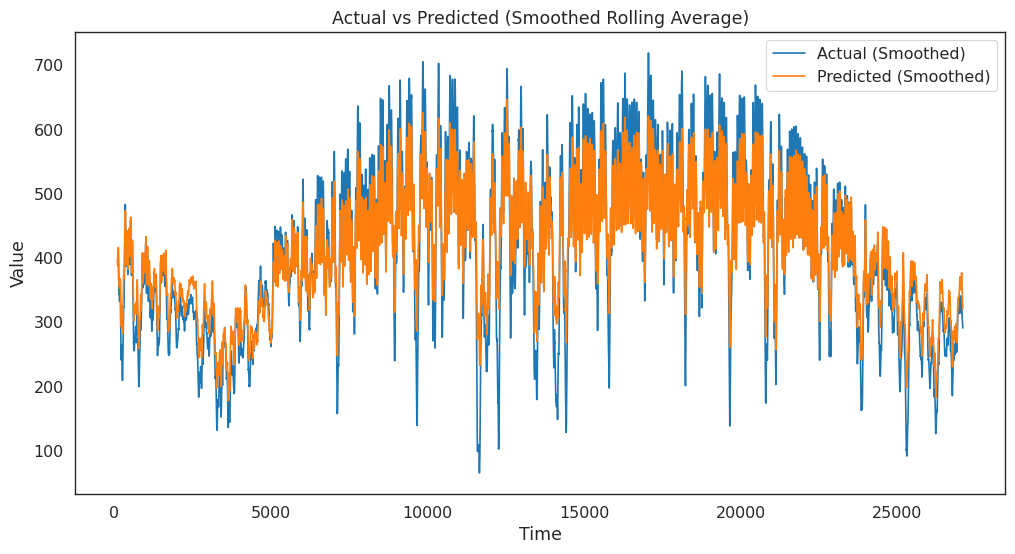

In [132]:
window = 100  # Adjust window size

# Convert the NumPy arrays to Pandas Series for rolling calculations
actual_series = pd.Series(actual.flatten())  # Flatten to 1D if necessary
outputs_series = pd.Series(outputs.flatten()) # Flatten to 1D if necessary

# Calculate rolling means using Pandas
actual_smooth = actual_series.rolling(window=window).mean()
outputs_smooth = outputs_series.rolling(window=window).mean()

plt.figure(figsize=(12, 6))
plt.plot(actual_smooth, label="Actual (Smoothed)", linestyle="-")
plt.plot(outputs_smooth, label="Predicted (Smoothed)", linestyle="-")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Actual vs Predicted (Smoothed Rolling Average)")
plt.legend()
plt.show()

In [133]:
from sklearn.linear_model import Ridge

benchmark_model = Ridge(alpha = 0.8)

start = time()
benchmark_model.fit(X_train_scaled, Y_train_scaled)
end = time()

# Make predictions
outputs = benchmark_model.predict(X_test_scaled)

# Inverse transform Y_pred and Y_test_df
# Inverse transform Y_test_df and Y_pred (ensure they are 2D)
actual = Y_scaler.inverse_transform(Y_test_scaled.reshape(-1, 1))
outputs = Y_scaler.inverse_transform(outputs.reshape(-1, 1))

training_score = benchmark_model.score(X_train_scaled, Y_train_scaled) * 100
testing_score = benchmark_model.score(X_test_scaled, Y_test_scaled) * 100

print("Regressor fitted in {:.4f} seconds".format(end - start))
print("Score on Training data : {:.4f}%".format(training_score))
print("Score on Testing data : {:.4f}%".format(testing_score))

# Compute error metrics in the original scale
rmse = np.sqrt(mean_squared_error(actual, outputs))
nrmse_mean = rmse / np.mean(actual)
print("RMSE : {:.4f}".format(rmse))
print(f"nRMSE: {nrmse_mean:.4f}")
mae = mean_absolute_error(actual, outputs)
print(f"MAE: {mae:.4f}")

properties = pd.concat(
    [properties, pd.Series(
      {
        "Name": "Ridge Regression",
        "RMSE": round(rmse, 4),
        "nRMSE": round(nrmse_mean, 4),
        "MAE": round(mae, 4),
        "Training Scores": round(training_score, 4),
        "Testing Scores" : round(testing_score, 4),
        "Training Times": round(end - start, 4)

    }
    ).to_frame().T.set_index(["Name"])]
)

Regressor fitted in 0.0429 seconds
Score on Training data : 70.9076%
Score on Testing data : 72.8614%
RMSE : 139.7940
nRMSE: 0.3389
MAE: 105.2268


In [134]:
properties

,RMSE,nRMSE,MAE,Training Scores,Testing Scores,Training Times
Name,,,,,,
Linear Regression (Benchmark),139.7926,0.3389,105.2233,70.9076,72.8619,0.1063
Ridge Regression,139.794,0.3389,105.2268,70.9076,72.8614,0.0429


In [135]:
from sklearn.neighbors import KNeighborsRegressor

benchmark_model = KNeighborsRegressor(n_neighbors = 5, metric = "euclidean", weights = "uniform")
print(benchmark_model)

start = time()
benchmark_model.fit(X_train_scaled, Y_train_scaled)
end = time()

# Make predictions
outputs = benchmark_model.predict(X_test_scaled)

# Inverse transform Y_pred and Y_test_df
# Inverse transform Y_test_df and Y_pred (ensure they are 2D)
actual = Y_scaler.inverse_transform(Y_test_scaled.reshape(-1, 1))
outputs = Y_scaler.inverse_transform(outputs.reshape(-1, 1))

training_score = benchmark_model.score(X_train_scaled, Y_train_scaled) * 100
testing_score = benchmark_model.score(X_test_scaled, Y_test_scaled) * 100

print("Regressor fitted in {:.4f} seconds".format(end - start))
print("Score on Training data : {:.4f}%".format(training_score))
print("Score on Testing data : {:.4f}%".format(testing_score))

# Compute error metrics in the original scale
rmse = np.sqrt(mean_squared_error(actual, outputs))
nrmse_mean = rmse / np.mean(actual)
print("RMSE : {:.4f}".format(rmse))
print(f"nRMSE: {nrmse_mean:.4f}")
mae = mean_absolute_error(actual, outputs)
print(f"MAE: {mae:.4f}")

properties = pd.concat(
    [properties, pd.Series(
      {
        "Name": "KNeighbours Regressor",
        "RMSE": round(rmse, 4),
        "nRMSE": round(nrmse_mean, 4),
        "MAE": round(mae, 4),
        "Training Scores": round(training_score, 4),
        "Testing Scores" : round(testing_score, 4),
        "Training Times": round(end - start, 4)

    }
    ).to_frame().T.set_index(["Name"])]
)

KNeighborsRegressor(metric='euclidean')
Regressor fitted in 0.0107 seconds
Score on Training data : 87.9788%
Score on Testing data : 76.6147%
RMSE : 129.7675
nRMSE: 0.3146
MAE: 82.2484


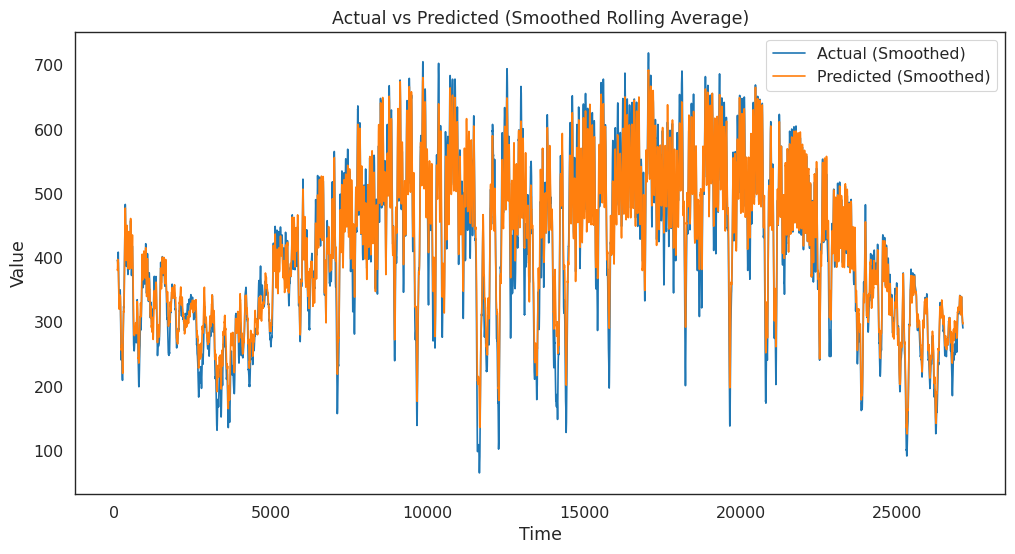

In [136]:
window = 100  # Adjust window size

# Convert the NumPy arrays to Pandas Series for rolling calculations
actual_series = pd.Series(actual.flatten())  # Flatten to 1D if necessary
outputs_series = pd.Series(outputs.flatten()) # Flatten to 1D if necessary

# Calculate rolling means using Pandas
actual_smooth = actual_series.rolling(window=window).mean()
outputs_smooth = outputs_series.rolling(window=window).mean()

plt.figure(figsize=(12, 6))
plt.plot(actual_smooth, label="Actual (Smoothed)", linestyle="-")
plt.plot(outputs_smooth, label="Predicted (Smoothed)", linestyle="-")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Actual vs Predicted (Smoothed Rolling Average)")
plt.legend()
plt.show()

In [137]:
from sklearn.ensemble import RandomForestRegressor

benchmark_model = RandomForestRegressor(n_estimators = 125, max_depth = 100, min_samples_split = 4, min_samples_leaf = 4)
print(benchmark_model)

start = time()
Y_train_scaled = Y_train_scaled.ravel()
benchmark_model.fit(X_train_scaled, Y_train_scaled)
end = time()

# Make predictions
outputs = benchmark_model.predict(X_test_scaled)

# Inverse transform Y_pred and Y_test_df
# Inverse transform Y_test_df and Y_pred (ensure they are 2D)
actual = Y_scaler.inverse_transform(Y_test_scaled.reshape(-1, 1))
outputs = Y_scaler.inverse_transform(outputs.reshape(-1, 1))

training_score = benchmark_model.score(X_train_scaled, Y_train_scaled) * 100
testing_score = benchmark_model.score(X_test_scaled, Y_test_scaled) * 100

print("Regressor fitted in {:.2f} seconds".format(end - start))
print("Score on Training data : {:.2f}%".format(training_score))
print("Score on Testing data : {:.2f}%".format(testing_score))

print("Regressor fitted in {:.4f} seconds".format(end - start))
print("Score on Training data : {:.4f}%".format(training_score))
print("Score on Testing data : {:.4f}%".format(testing_score))

# Compute error metrics in the original scale
rmse = np.sqrt(mean_squared_error(actual, outputs))
nrmse_mean = rmse / np.mean(actual)
print("RMSE : {:.4f}".format(rmse))
print(f"nRMSE: {nrmse_mean:.4f}")
mae = mean_absolute_error(actual, outputs)
print(f"MAE: {mae:.4f}")

properties = pd.concat(
    [properties, pd.Series(
      {
        "Name": "RandomForest Regressor",
        "RMSE": round(rmse, 4),
        "nRMSE": round(nrmse_mean, 4),
        "MAE": round(mae, 4),
        "Training Scores": round(training_score, 4),
        "Testing Scores" : round(testing_score, 4),
        "Training Times": round(end - start, 4)

    }
    ).to_frame().T.set_index(["Name"])]
)

RandomForestRegressor(max_depth=100, min_samples_leaf=4, min_samples_split=4,
                      n_estimators=125)
Regressor fitted in 394.27 seconds
Score on Training data : 94.51%
Score on Testing data : 82.17%
Regressor fitted in 394.2720 seconds
Score on Training data : 94.5062%
Score on Testing data : 82.1721%
RMSE : 113.3038
nRMSE: 0.2747
MAE: 71.1192


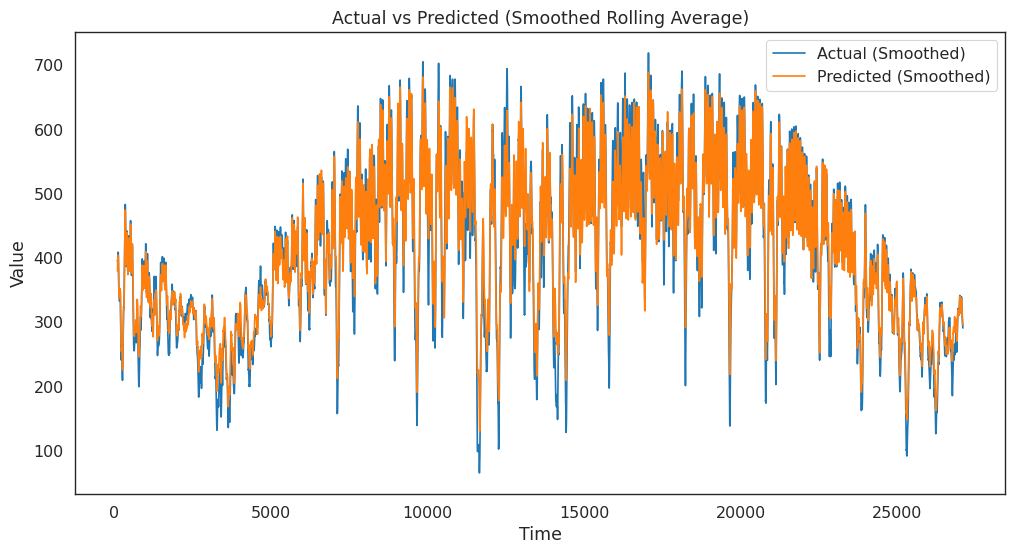

In [138]:
window = 100  # Adjust window size

# Convert the NumPy arrays to Pandas Series for rolling calculations
actual_series = pd.Series(actual.flatten())  # Flatten to 1D if necessary
outputs_series = pd.Series(outputs.flatten()) # Flatten to 1D if necessary

# Calculate rolling means using Pandas
actual_smooth = actual_series.rolling(window=window).mean()
outputs_smooth = outputs_series.rolling(window=window).mean()

plt.figure(figsize=(12, 6))
plt.plot(actual_smooth, label="Actual (Smoothed)", linestyle="-")
plt.plot(outputs_smooth, label="Predicted (Smoothed)", linestyle="-")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Actual vs Predicted (Smoothed Rolling Average)")
plt.legend()
plt.show()

In [139]:
from sklearn.ensemble import GradientBoostingRegressor

benchmark_model = GradientBoostingRegressor(n_estimators = 125, max_depth = 5, min_samples_split = 4, min_samples_leaf = 4)
print(benchmark_model)

start = time()
Y_train_scaled = Y_train_scaled.ravel()
benchmark_model.fit(X_train_scaled, Y_train_scaled)
end = time()

# Make predictions
outputs = benchmark_model.predict(X_test_scaled)

# Inverse transform Y_pred and Y_test_df
# Inverse transform Y_test_df and Y_pred (ensure they are 2D)
actual = Y_scaler.inverse_transform(Y_test_scaled.reshape(-1, 1))
outputs = Y_scaler.inverse_transform(outputs.reshape(-1, 1))

training_score = benchmark_model.score(X_train_scaled, Y_train_scaled) * 100
testing_score = benchmark_model.score(X_test_scaled, Y_test_scaled) * 100

print("Regressor fitted in {:.2f} seconds".format(end - start))
print("Score on Training data : {:.2f}%".format(training_score))
print("Score on Testing data : {:.2f}%".format(testing_score))

print("Regressor fitted in {:.4f} seconds".format(end - start))
print("Score on Training data : {:.4f}%".format(training_score))
print("Score on Testing data : {:.4f}%".format(testing_score))

# Compute error metrics in the original scale
rmse = np.sqrt(mean_squared_error(actual, outputs))
nrmse_mean = rmse / np.mean(actual)
print("RMSE : {:.4f}".format(rmse))
print(f"nRMSE: {nrmse_mean:.4f}")
mae = mean_absolute_error(actual, outputs)
print(f"MAE: {mae:.4f}")

properties = pd.concat(
    [properties, pd.Series(
      {
        "Name": "GradientBoosting Regressor",
        "RMSE": round(rmse, 4),
        "nRMSE": round(nrmse_mean, 4),
        "MAE": round(mae, 4),
        "Training Scores": round(training_score, 4),
        "Testing Scores" : round(testing_score, 4),
        "Training Times": round(end - start, 4)

    }
    ).to_frame().T.set_index(["Name"])]
)

GradientBoostingRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=4,
                          n_estimators=125)
Regressor fitted in 153.80 seconds
Score on Training data : 82.84%
Score on Testing data : 81.51%
Regressor fitted in 153.8015 seconds
Score on Training data : 82.8389%
Score on Testing data : 81.5131%
RMSE : 115.3789
nRMSE: 0.2797
MAE: 75.3541


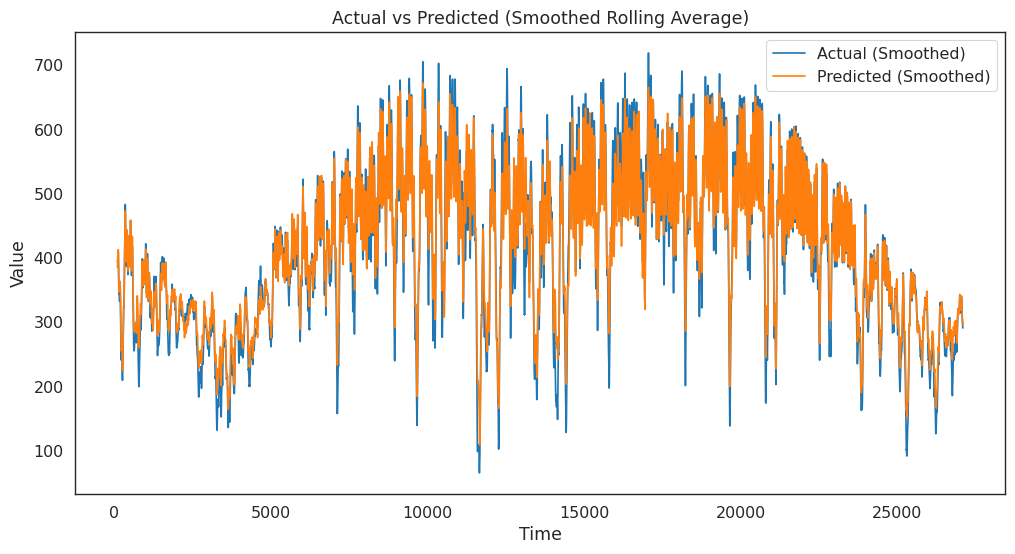

In [140]:
window = 100  # Adjust window size

# Convert the NumPy arrays to Pandas Series for rolling calculations
actual_series = pd.Series(actual.flatten())  # Flatten to 1D if necessary
outputs_series = pd.Series(outputs.flatten()) # Flatten to 1D if necessary

# Calculate rolling means using Pandas
actual_smooth = actual_series.rolling(window=window).mean()
outputs_smooth = outputs_series.rolling(window=window).mean()

plt.figure(figsize=(12, 6))
plt.plot(actual_smooth, label="Actual (Smoothed)", linestyle="-")
plt.plot(outputs_smooth, label="Predicted (Smoothed)", linestyle="-")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Actual vs Predicted (Smoothed Rolling Average)")
plt.legend()
plt.show()

In [141]:
from sklearn.ensemble import ExtraTreesRegressor

benchmark_model = ExtraTreesRegressor(n_estimators = 125, max_depth = 100, min_samples_split = 4, min_samples_leaf = 4)
print(benchmark_model)

start = time()
Y_train_scaled = Y_train_scaled.ravel()
benchmark_model.fit(X_train_scaled, Y_train_scaled)
end = time()

# Make predictions
outputs = benchmark_model.predict(X_test_scaled)

# Inverse transform Y_pred and Y_test_df
# Inverse transform Y_test_df and Y_pred (ensure they are 2D)
actual = Y_scaler.inverse_transform(Y_test_scaled.reshape(-1, 1))
outputs = Y_scaler.inverse_transform(outputs.reshape(-1, 1))

training_score = benchmark_model.score(X_train_scaled, Y_train_scaled) * 100
testing_score = benchmark_model.score(X_test_scaled, Y_test_scaled) * 100

print("Regressor fitted in {:.2f} seconds".format(end - start))
print("Score on Training data : {:.2f}%".format(training_score))
print("Score on Testing data : {:.2f}%".format(testing_score))

print("Regressor fitted in {:.4f} seconds".format(end - start))
print("Score on Training data : {:.4f}%".format(training_score))
print("Score on Testing data : {:.4f}%".format(testing_score))

# Compute error metrics in the original scale
rmse = np.sqrt(mean_squared_error(actual, outputs))
nrmse_mean = rmse / np.mean(actual)
print("RMSE : {:.4f}".format(rmse))
print(f"nRMSE: {nrmse_mean:.4f}")
mae = mean_absolute_error(actual, outputs)
print(f"MAE: {mae:.4f}")

properties = pd.concat(
    [properties, pd.Series(
      {
        "Name": "ExtraTrees Regressor",
        "RMSE": round(rmse, 4),
        "nRMSE": round(nrmse_mean, 4),
        "MAE": round(mae, 4),
        "Training Scores": round(training_score, 4),
        "Testing Scores" : round(testing_score, 4),
        "Training Times": round(end - start, 4)

    }
    ).to_frame().T.set_index(["Name"])]
)

ExtraTreesRegressor(max_depth=100, min_samples_leaf=4, min_samples_split=4,
                    n_estimators=125)
Regressor fitted in 72.01 seconds
Score on Training data : 95.25%
Score on Testing data : 82.44%
Regressor fitted in 72.0064 seconds
Score on Training data : 95.2520%
Score on Testing data : 82.4354%
RMSE : 112.4640
nRMSE: 0.2727
MAE: 70.5119


In [142]:
from sklearn.neural_network import MLPRegressor

benchmark_model = MLPRegressor(batch_size = 256, solver = "adam", activation = "relu", max_iter = 300, learning_rate_init = 0.005)
print(benchmark_model)

start = time()
benchmark_model.fit(X_train_scaled, Y_train_scaled)
end = time()

# Make predictions
outputs = benchmark_model.predict(X_test_scaled)

# Inverse transform Y_pred and Y_test_df
# Inverse transform Y_test_df and Y_pred (ensure they are 2D)
actual = Y_scaler.inverse_transform(Y_test_scaled.reshape(-1, 1))
outputs = Y_scaler.inverse_transform(outputs.reshape(-1, 1))

training_score = benchmark_model.score(X_train_scaled, Y_train_scaled) * 100
testing_score = benchmark_model.score(X_test_scaled, Y_test_scaled) * 100

print("Regressor fitted in {:.2f} seconds".format(end - start))
print("Score on Training data : {:.2f}%".format(training_score))
print("Score on Testing data : {:.2f}%".format(testing_score))

print("Regressor fitted in {:.4f} seconds".format(end - start))
print("Score on Training data : {:.4f}%".format(training_score))
print("Score on Testing data : {:.4f}%".format(testing_score))

# Compute error metrics in the original scale
rmse = np.sqrt(mean_squared_error(actual, outputs))
nrmse_mean = rmse / np.mean(actual)
print("RMSE : {:.4f}".format(rmse))
print(f"nRMSE: {nrmse_mean:.4f}")
mae = mean_absolute_error(actual, outputs)
print(f"MAE: {mae:.4f}")

properties = pd.concat(
    [properties, pd.Series(
      {
        "Name": "MLP Regressor",
        "RMSE": round(rmse, 4),
        "nRMSE": round(nrmse_mean, 4),
        "MAE": round(mae, 4),
        "Training Scores": round(training_score, 4),
        "Testing Scores" : round(testing_score, 4),
        "Training Times": round(end - start, 4)

    }
    ).to_frame().T.set_index(["Name"])]
)

MLPRegressor(batch_size=256, learning_rate_init=0.005, max_iter=300)
Regressor fitted in 26.35 seconds
Score on Training data : 81.63%
Score on Testing data : 81.26%
Regressor fitted in 26.3549 seconds
Score on Training data : 81.6264%
Score on Testing data : 81.2636%
RMSE : 116.1549
nRMSE: 0.2816
MAE: 78.0416


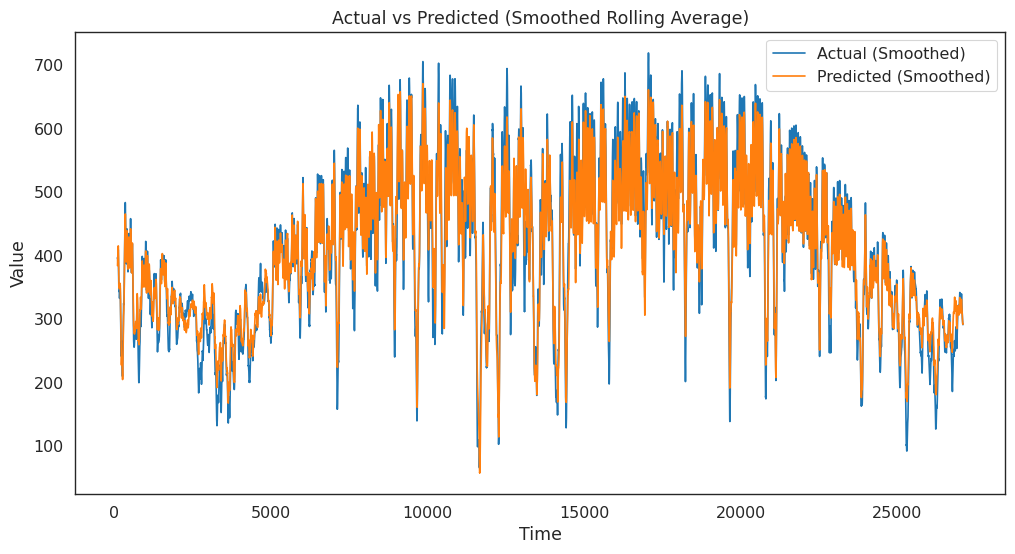

In [143]:
window = 100  # Adjust window size

# Convert the NumPy arrays to Pandas Series for rolling calculations
actual_series = pd.Series(actual.flatten())  # Flatten to 1D if necessary
outputs_series = pd.Series(outputs.flatten()) # Flatten to 1D if necessary

# Calculate rolling means using Pandas
actual_smooth = actual_series.rolling(window=window).mean()
outputs_smooth = outputs_series.rolling(window=window).mean()

plt.figure(figsize=(12, 6))
plt.plot(actual_smooth, label="Actual (Smoothed)", linestyle="-")
plt.plot(outputs_smooth, label="Predicted (Smoothed)", linestyle="-")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Actual vs Predicted (Smoothed Rolling Average)")
plt.legend()
plt.show()

In [144]:
properties

,RMSE,nRMSE,MAE,Training Scores,Testing Scores,Training Times
Name,,,,,,
Linear Regression (Benchmark),139.7926,0.3389,105.2233,70.9076,72.8619,0.1063
Ridge Regression,139.794,0.3389,105.2268,70.9076,72.8614,0.0429
KNeighbours Regressor,129.7675,0.3146,82.2484,87.9788,76.6147,0.0107
RandomForest Regressor,113.3038,0.2747,71.1192,94.5062,82.1721,394.272
GradientBoosting Regressor,115.3789,0.2797,75.3541,82.8389,81.5131,153.8015
ExtraTrees Regressor,112.464,0.2727,70.5119,95.252,82.4354,72.0064
MLP Regressor,116.1549,0.2816,78.0416,81.6264,81.2636,26.3549


In [145]:
properties.sort_values(by = "nRMSE")

,RMSE,nRMSE,MAE,Training Scores,Testing Scores,Training Times
Name,,,,,,
ExtraTrees Regressor,112.464,0.2727,70.5119,95.252,82.4354,72.0064
RandomForest Regressor,113.3038,0.2747,71.1192,94.5062,82.1721,394.272
GradientBoosting Regressor,115.3789,0.2797,75.3541,82.8389,81.5131,153.8015
MLP Regressor,116.1549,0.2816,78.0416,81.6264,81.2636,26.3549
KNeighbours Regressor,129.7675,0.3146,82.2484,87.9788,76.6147,0.0107
Linear Regression (Benchmark),139.7926,0.3389,105.2233,70.9076,72.8619,0.1063
Ridge Regression,139.794,0.3389,105.2268,70.9076,72.8614,0.0429


# Performance Of Models

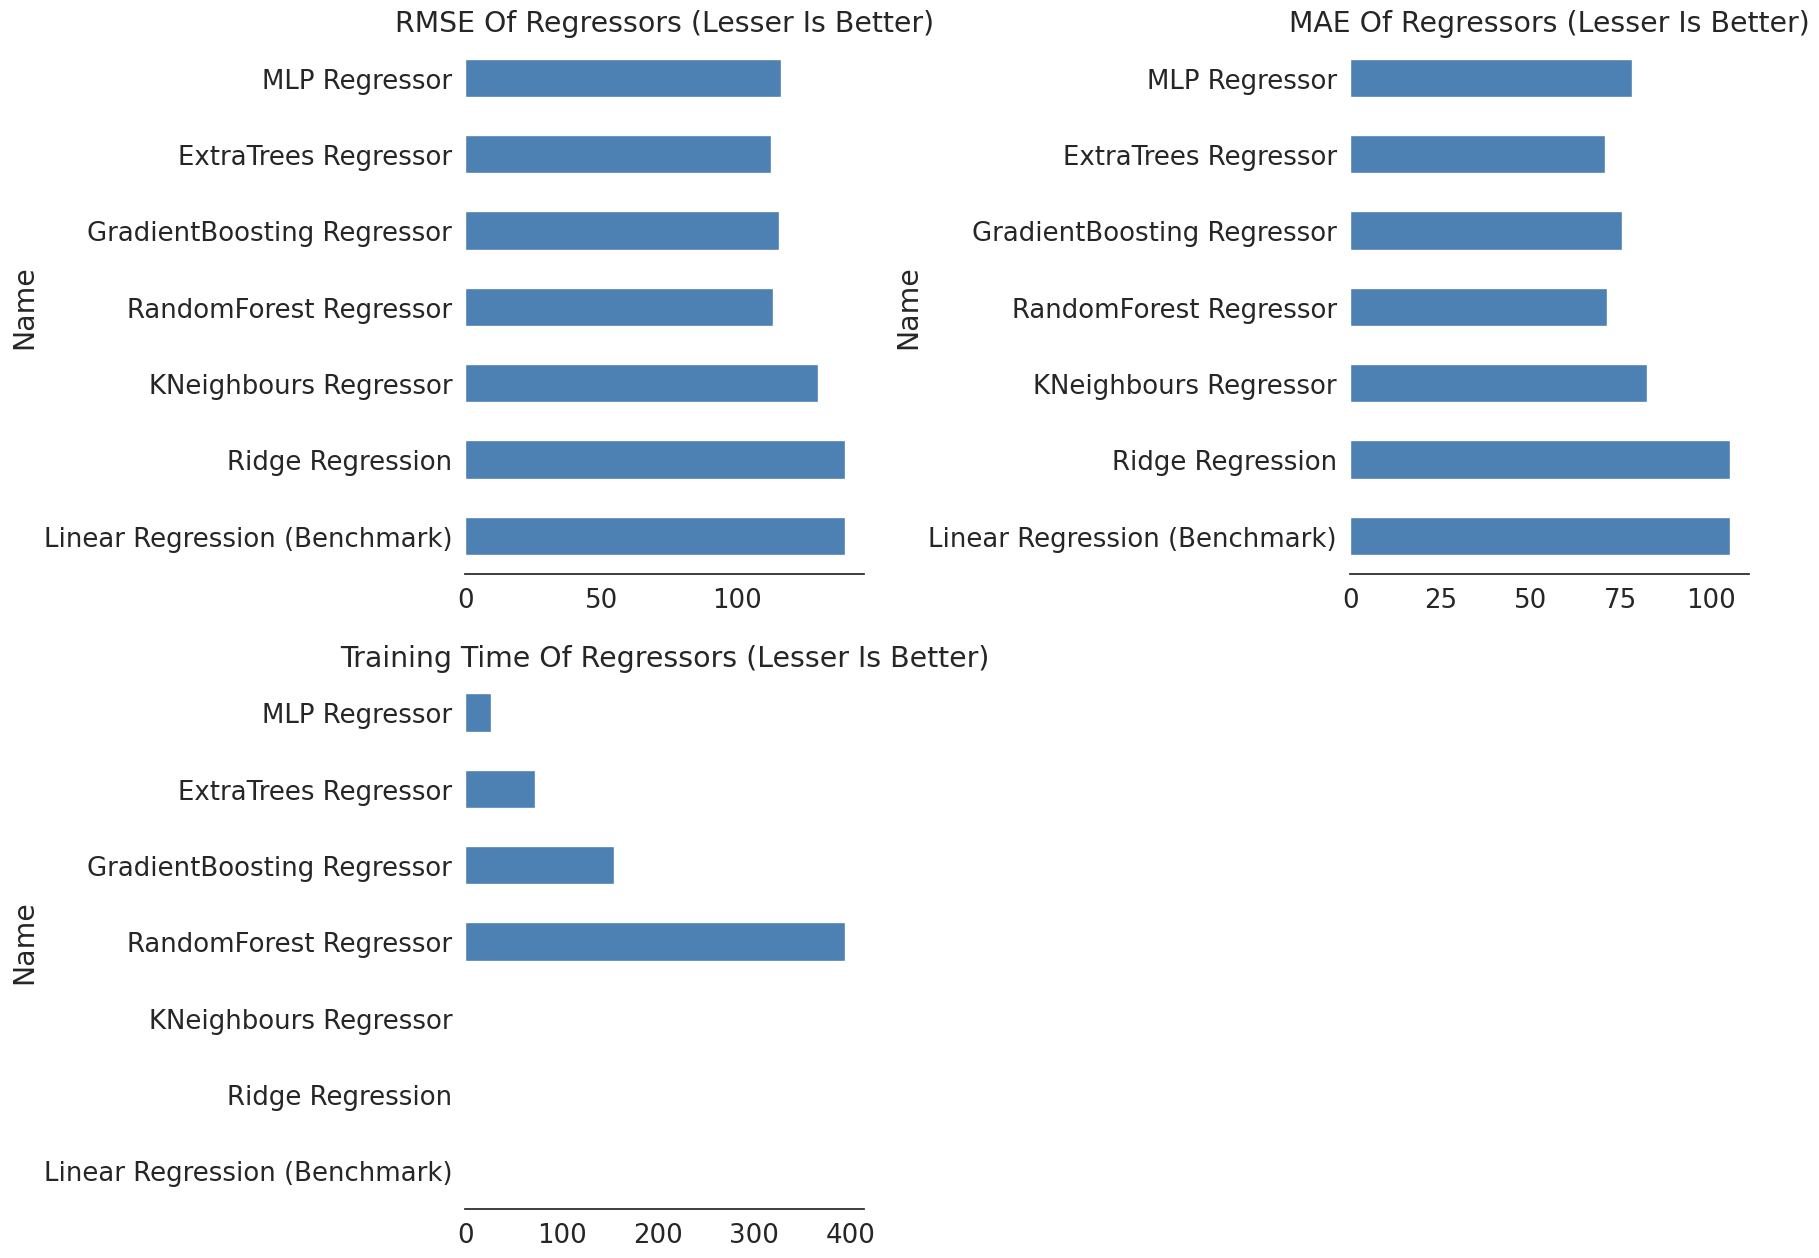

In [146]:
# Plot to compare thePerformance of Algorithms
sns.set_context("notebook", font_scale=1.7)
plt.figure(figsize=(18,13))

plt.subplot(2,2,1)
plt.title("RMSE Of Regressors (Lesser Is Better)")
properties["RMSE"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()


plt.subplot(2,2,2)
plt.title("MAE Of Regressors (Lesser Is Better)")
properties["MAE"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()

plt.subplot(2,2,3)
plt.title("Training Time Of Regressors (Lesser Is Better)")
properties["Training Times"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()

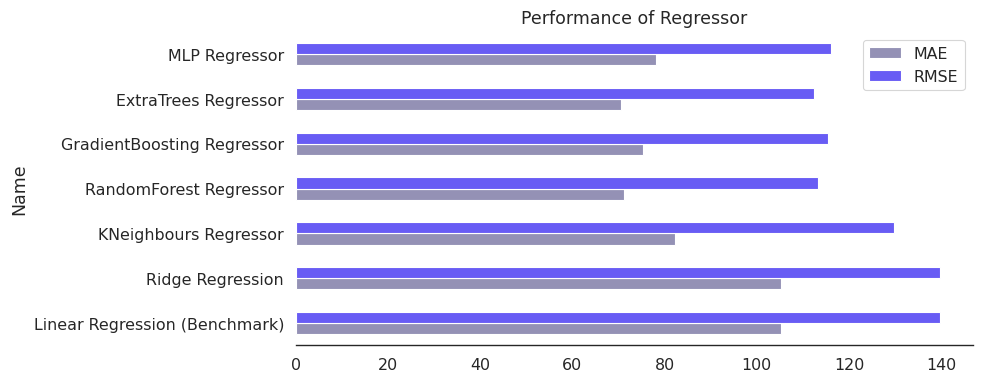

In [147]:
sns.set_style('white')
sns.set_context("paper", font_scale=1.3)

ax= properties[["MAE", "RMSE"]].plot(kind="barh", color=['#9491B5', '#685CF4'], title="Performance of Regressor", figsize=(10, 4))
sns.despine(left=True);
plt.tight_layout()

plt.show()

#Optimizing Best Peforming Model

In [148]:
from copy import deepcopy as dc

data = dc(data_df)
data['local_datetime'] = pd.to_datetime(data_df['local_datetime'])
data.set_index('local_datetime', inplace = True)
data.drop('datetime', axis = 1, inplace = True)
data['Target'] = data['GHI'].shift(-6)
data.dropna(inplace = True)

In [149]:
Y = data['Target'].to_numpy()
X = data.drop(['Target'], axis = 1)
featuresTrain = X.columns
X = X.to_numpy()

In [150]:
def data_split_scale(X, Y):
  train = int(0.8 * len(X))  # 80% Train
  test = len(X) - train #20% test

  X_train, Y_train = X[:train], Y[:train]
  X_test, Y_test = X[train:], Y[train:]

  X_scaler = MinMaxScaler(feature_range=(-1,1))
  Y_scaler = MinMaxScaler(feature_range=(-1,1))

  X_train_scaled = X_scaler.fit_transform(X_train)
  X_test_scaled = X_scaler.transform(X_test)

  Y_train_scaled = Y_scaler.fit_transform(Y_train.reshape(-1,1))
  Y_test_scaled = Y_scaler.transform(Y_test.reshape(-1,1))

  print("Shapes:", X_train_scaled.shape, Y_train_scaled.shape, X_test_scaled.shape, Y_test_scaled.shape)

  return X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled, X_scaler, Y_scaler

X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled, X_scaler, Y_scaler = data_split_scale(X, Y)

Shapes: (108416, 56) (108416, 1) (27104, 56) (27104, 1)


In [151]:
from sklearn.ensemble import ExtraTreesRegressor

# Train model
etr = ExtraTreesRegressor()
Y_train_scaled = Y_train_scaled.ravel()
etr.fit(X_train_scaled, Y_train_scaled)

# Get feature importance
importances = etr.feature_importances_

# Sort and plot
feat_imp = pd.Series(importances, index=featuresTrain).sort_values(ascending=False)
top_features = feat_imp[feat_imp > 0.01].index
print(top_features)

Index(['GHI', 'GHI_T_1', 'Hour', 'GHI_T_2', 'Clearsky GHI', 'GHI_T_3',
       'Solar Zenith Angle', 'DNI', 'Kcs'],
      dtype='object')


In [152]:
X = data[list(top_features)].to_numpy()
X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled, X_scaler, Y_scaler = data_split_scale(X, Y)

Shapes: (108416, 9) (108416, 1) (27104, 9) (27104, 1)


In [153]:
from sklearn.ensemble import ExtraTreesRegressor

benchmark_model = ExtraTreesRegressor(n_estimators = 125, max_depth = 100, min_samples_split = 4, min_samples_leaf = 4)
print(benchmark_model)

start = time()
Y_train_scaled = Y_train_scaled.ravel()
benchmark_model.fit(X_train_scaled, Y_train_scaled)
end = time()

# Make predictions
outputs = benchmark_model.predict(X_test_scaled)

# Inverse transform Y_pred and Y_test_df
# Inverse transform Y_test_df and Y_pred (ensure they are 2D)
actual = Y_scaler.inverse_transform(Y_test_scaled.reshape(-1, 1))
outputs = Y_scaler.inverse_transform(outputs.reshape(-1, 1))

training_score = benchmark_model.score(X_train_scaled, Y_train_scaled) * 100
testing_score = benchmark_model.score(X_test_scaled, Y_test_scaled) * 100

print("Regressor fitted in {:.4f} seconds".format(end - start))
print("Score on Training data : {:.4f}%".format(training_score))
print("Score on Testing data : {:.4f}%".format(testing_score))

# Compute error metrics in the original scale
rmse = np.sqrt(mean_squared_error(actual, outputs))
nrmse_mean = rmse / np.mean(actual)
print("RMSE : {:.4f}".format(rmse))
print(f"nRMSE: {nrmse_mean:.4f}")
mae = mean_absolute_error(actual, outputs)
print(f"MAE: {mae:.4f}")

properties = pd.concat(
    [properties, pd.Series(
      {
        "Name": "ExtraTrees Regressor (With Feature Selection)",
        "RMSE": round(rmse, 4),
        "nRMSE": round(nrmse_mean, 4),
        "MAE": round(mae, 4),
        "Training Scores": round(training_score, 4),
        "Testing Scores" : round(testing_score, 4),
        "Training Times": round(end - start, 4)
    }
    ).to_frame().T.set_index(["Name"])]
)

ExtraTreesRegressor(max_depth=100, min_samples_leaf=4, min_samples_split=4,
                    n_estimators=125)
Regressor fitted in 25.7538 seconds
Score on Training data : 91.9427%
Score on Testing data : 83.1652%
RMSE : 110.1030
nRMSE: 0.2669
MAE: 67.1416


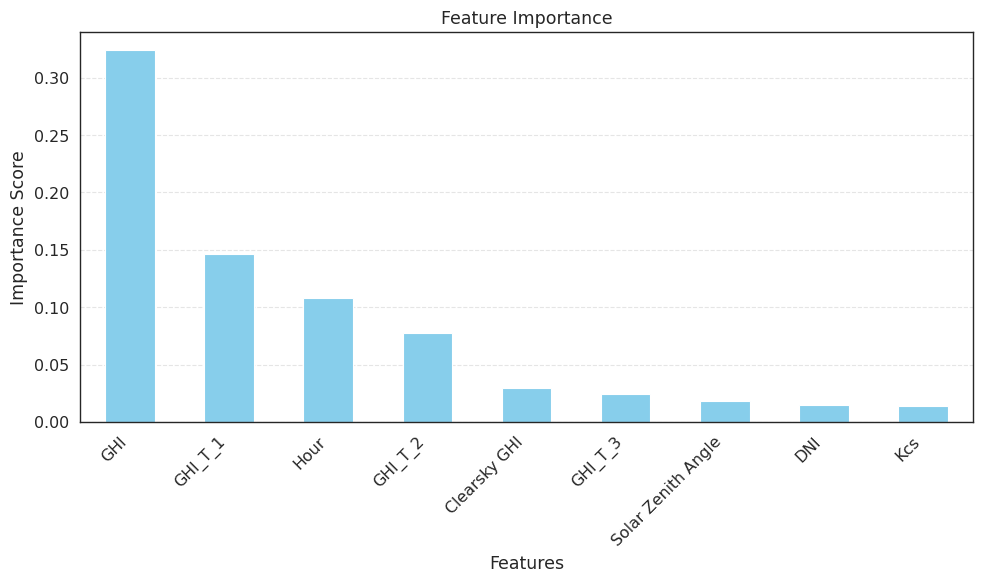

In [154]:
plt.figure(figsize=(10, 6))
feat_imp = feat_imp[feat_imp > 0.01]
feat_imp.plot(kind='bar', color='skyblue')

# Customizing the plot
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

In [155]:
properties.sort_values(by = "nRMSE")

,RMSE,nRMSE,MAE,Training Scores,Testing Scores,Training Times
Name,,,,,,
ExtraTrees Regressor (With Feature Selection),110.103,0.2669,67.1416,91.9427,83.1652,25.7538
ExtraTrees Regressor,112.464,0.2727,70.5119,95.252,82.4354,72.0064
RandomForest Regressor,113.3038,0.2747,71.1192,94.5062,82.1721,394.272
GradientBoosting Regressor,115.3789,0.2797,75.3541,82.8389,81.5131,153.8015
MLP Regressor,116.1549,0.2816,78.0416,81.6264,81.2636,26.3549
KNeighbours Regressor,129.7675,0.3146,82.2484,87.9788,76.6147,0.0107
Linear Regression (Benchmark),139.7926,0.3389,105.2233,70.9076,72.8619,0.1063
Ridge Regression,139.794,0.3389,105.2268,70.9076,72.8614,0.0429


In [156]:
properties.to_csv("60_Minutes_Ahead.csv", index = False)